In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#statistical analysis
from scipy.stats import chi2_contingency

#modelling libraraies
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
#load the dataset
data = pd.read_csv('/content/Mental Health Dataset_NEW (2).csv')
data

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226243,8/27/2014 23:10,Male,United States,Corporate,No,No,No,More than 2 months,No,Maybe,Maybe,Medium,No,Maybe,Maybe,No,No
226244,8/27/2014 23:14,Male,United States,Corporate,No,No,No,More than 2 months,No,Maybe,Maybe,Medium,No,Maybe,Maybe,No,No
226245,8/27/2014 23:30,Male,Australia,Corporate,No,No,No,More than 2 months,No,Maybe,Maybe,Medium,No,Maybe,Maybe,No,No
226246,8/27/2014 23:54,Male,United States,Corporate,No,No,Yes,More than 2 months,No,Maybe,Maybe,Medium,No,Maybe,Maybe,Maybe,Yes


In [5]:
data.shape

(226248, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226248 entries, 0 to 226247
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                226248 non-null  object
 1   Gender                   226248 non-null  object
 2   Country                  226248 non-null  object
 3   Occupation               226248 non-null  object
 4   self_employed            222116 non-null  object
 5   family_history           226248 non-null  object
 6   treatment                226248 non-null  object
 7   Days_Indoors             226248 non-null  object
 8   Growing_Stress           226248 non-null  object
 9   Changes_Habits           226248 non-null  object
 10  Mental_Health_History    226248 non-null  object
 11  Mood_Swings              226248 non-null  object
 12  Coping_Struggles         226248 non-null  object
 13  Work_Interest            226248 non-null  object
 14  Social_Weakness     

In [7]:
#Summary of Categorical Features.
data.describe().T

,count,unique,top,freq
Timestamp,226248,580,8/27/2014 11:43,1849
Gender,226248,2,Male,173734
Country,226248,35,United States,133902
Occupation,226248,5,Housewife,55281
self_employed,222116,2,No,200155
family_history,226248,2,No,133840
treatment,226248,2,Yes,116955
Days_Indoors,226248,5,1-14 days,46943
Growing_Stress,226248,3,Maybe,79690
Changes_Habits,226248,3,Yes,84923


In [3]:
#checking missing values
data.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,4132
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [10]:
#drop the Nan values
data.dropna(inplace=True)

In [9]:
#check any duplicates
data.duplicated().sum()

np.int64(1778)

In [11]:
#drop the duplicates
data.drop_duplicates(inplace=True)

In [12]:
#drop timestamp
data = data.drop(columns=["Timestamp"])


In [4]:
data['Days_Indoors'].unique()

array(['1-14 days', 'Go out Every day', 'More than 2 months',
       '15-30 days', '31-60 days'], dtype=object)

In [13]:
data.columns.tolist()

['Gender',
 'Country',
 'Occupation',
 'self_employed',
 'family_history',
 'treatment',
 'Days_Indoors',
 'Growing_Stress',
 'Changes_Habits',
 'Mental_Health_History',
 'Mood_Swings',
 'Coping_Struggles',
 'Work_Interest',
 'Social_Weakness',
 'mental_health_interview',
 'care_options']

In [14]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

# Exploratory Data Analysis (EDA):

In [15]:
data['treatment'].value_counts(normalize=True)

,proportion
treatment,
Yes,0.514777
No,0.485223


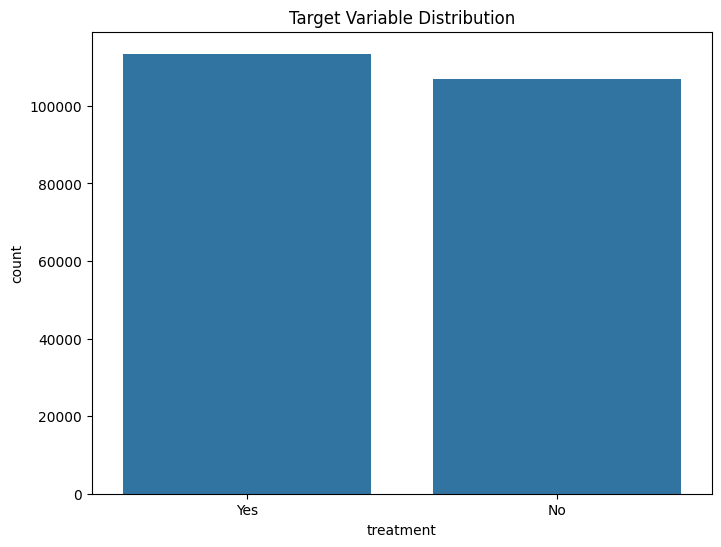

In [16]:
#Target Variable distribution
plt.figure(figsize=(8,6))
sns.countplot(x='treatment',data=data)
plt.title('Target Variable Distribution')
plt.show()

The treatment variable shows a nearly balanced distribution, with 51.5% ‘Yes’ and 48.5% ‘No’, indicating no significant class imbalance.

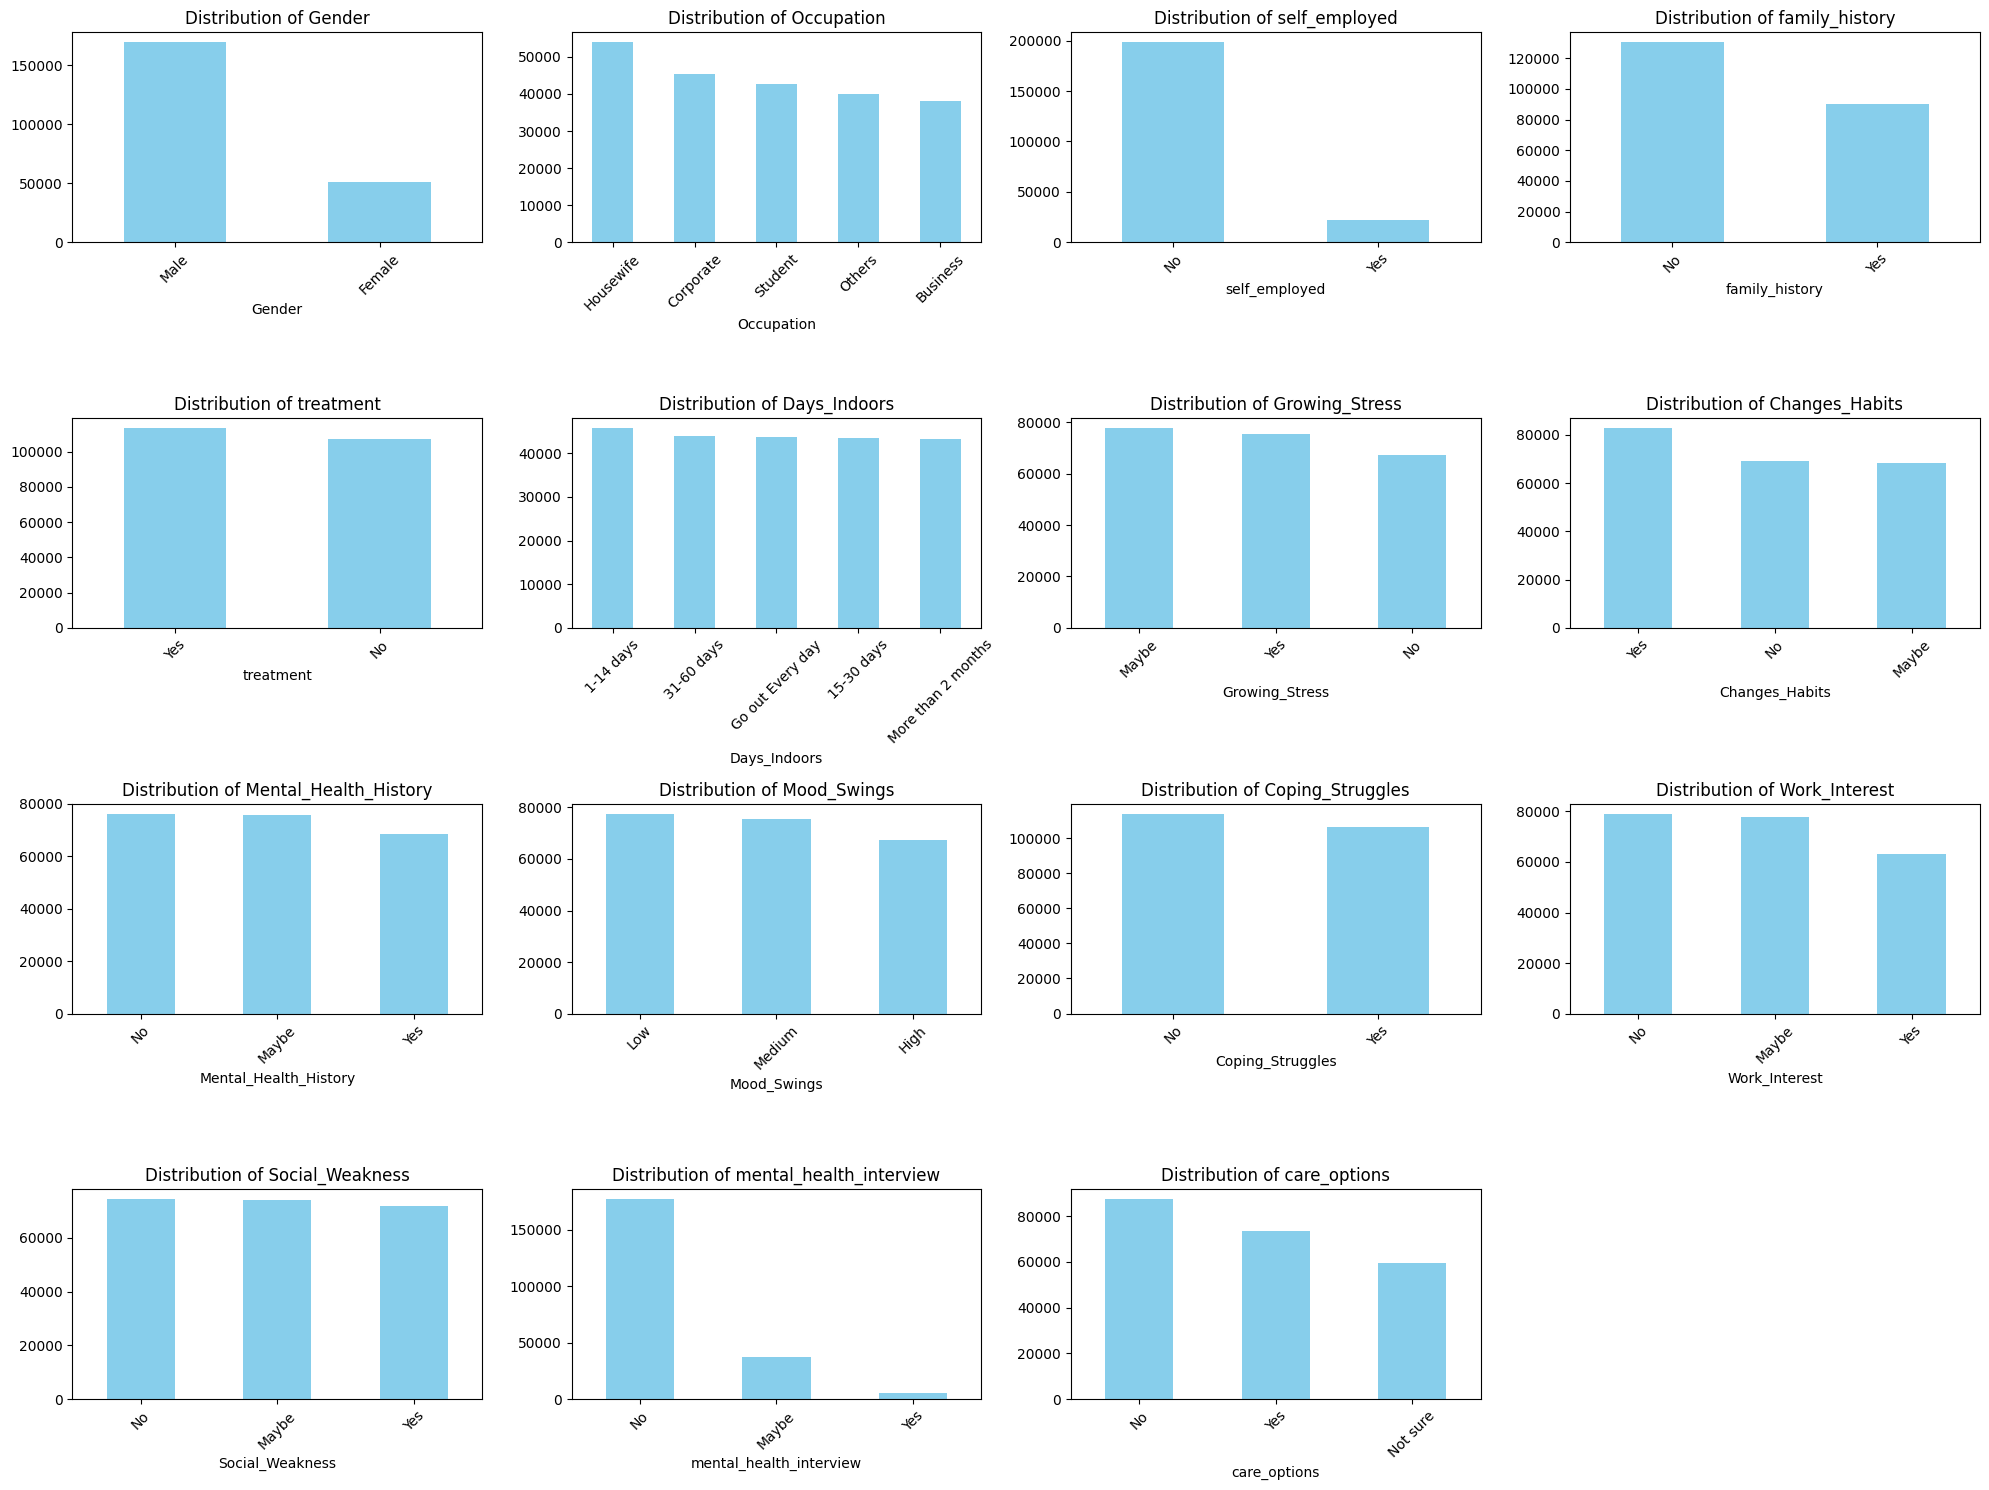

In [17]:
target_variable = 'treatment'

# 1. Distribution of each categorical feature
object_cols = data.select_dtypes(include=['object']).columns.drop(['Country' ],errors='ignore')

plt.figure(figsize=(20, 15))
for i, col in enumerate(object_cols, 1):
    plt.subplot(4, 4, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

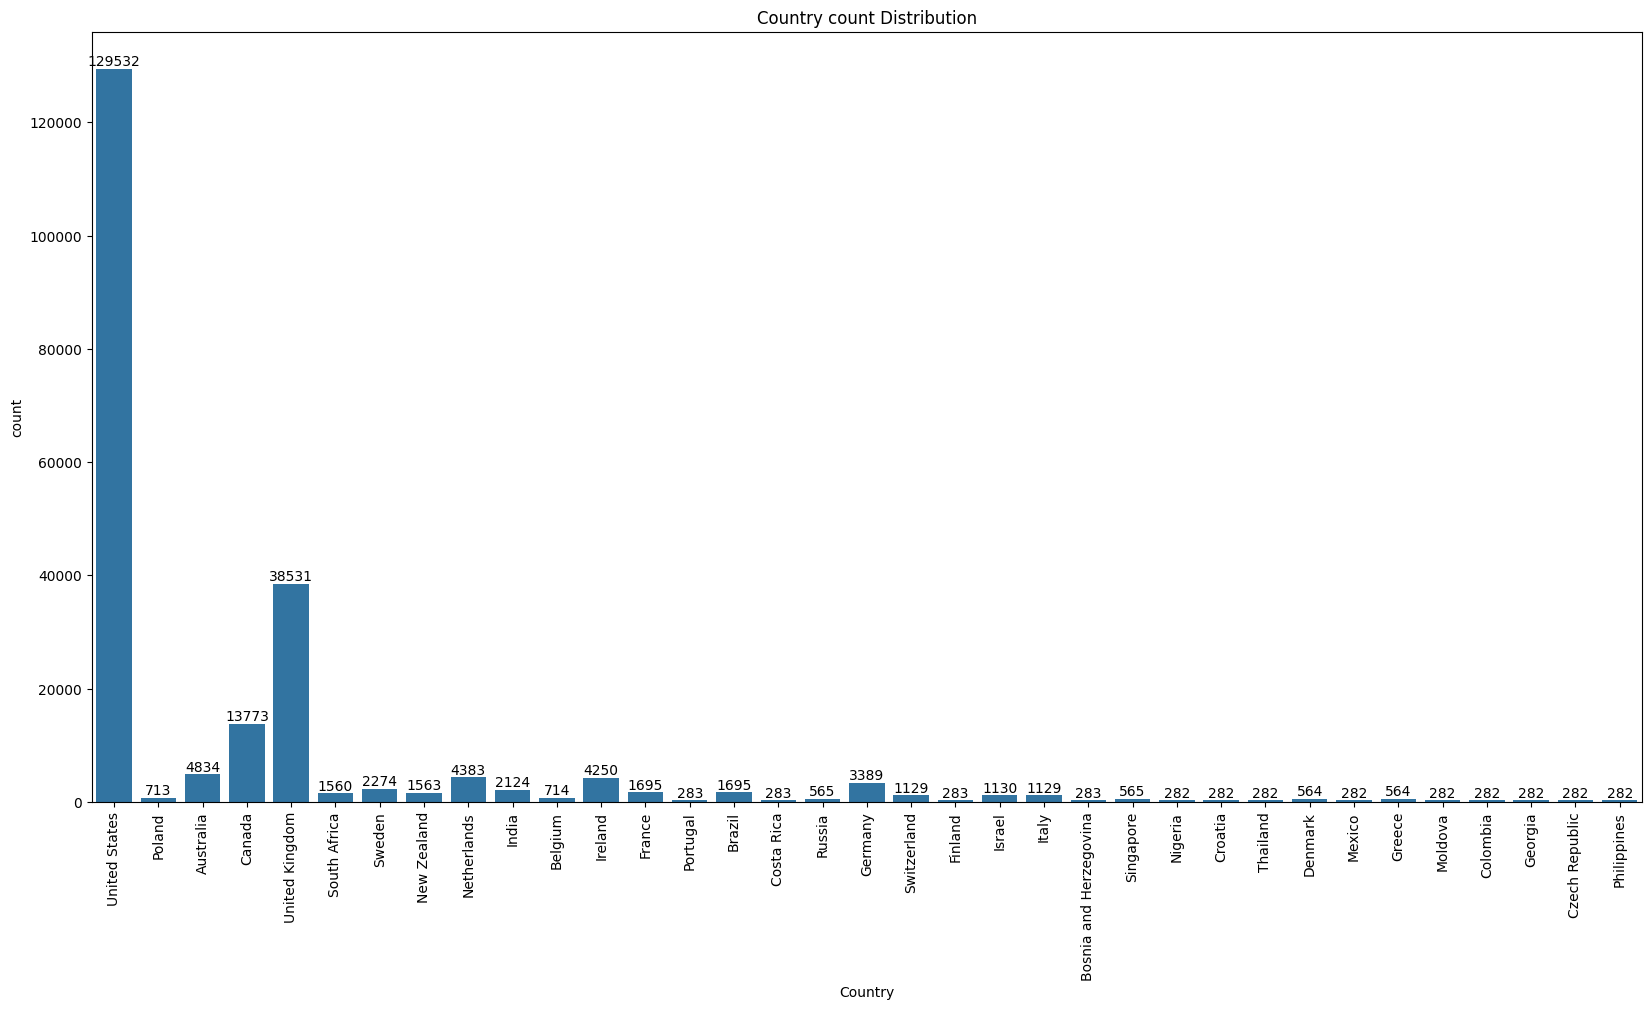

In [18]:
#distribution of country
plt.figure(figsize =(20,10))
ax =sns.countplot(x='Country',data=data)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)
    ax.set_title('Country count Distribution')
plt.show()

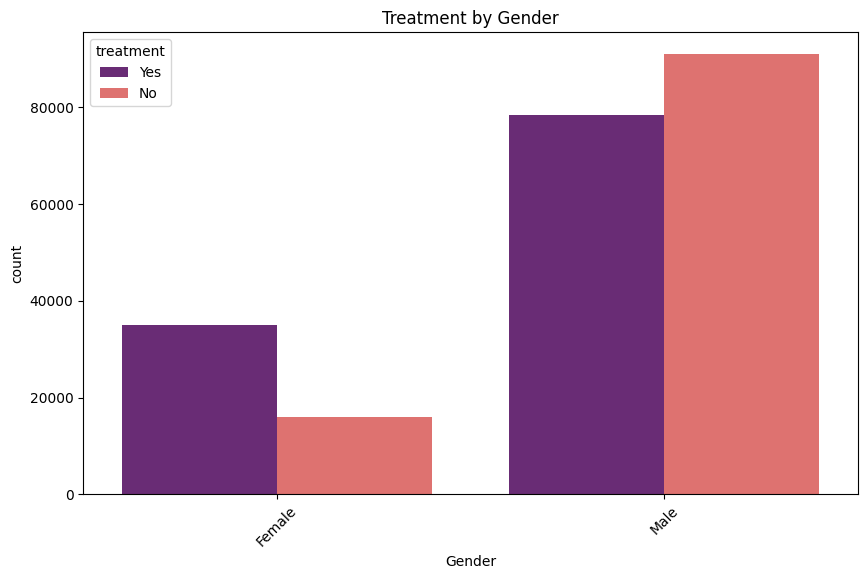

In [19]:
#Gender vs mental health outcome(treatment)
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Gender', hue='treatment', data=data, palette ='magma')
plt.title('Treatment by Gender')
plt.xticks(rotation=45)
plt.show()

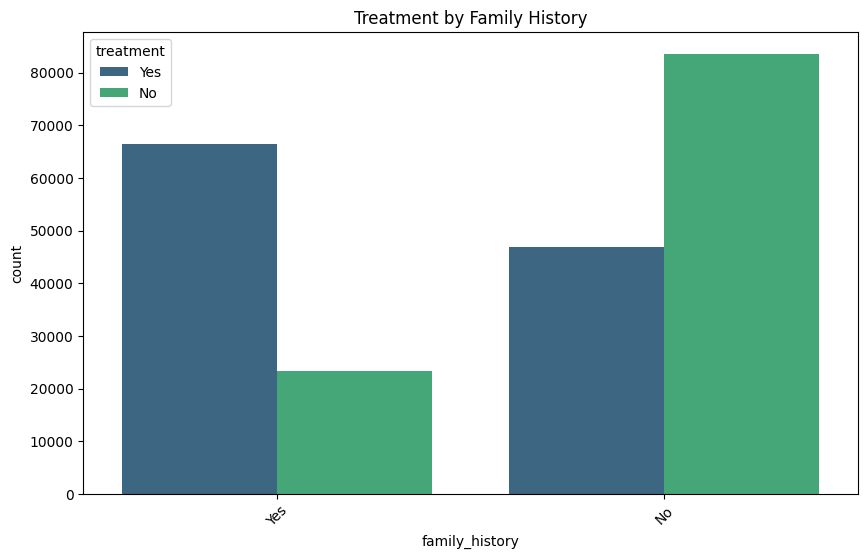

In [20]:
#does having family history increase risk of treatmnet?
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='family_history', hue='treatment', data=data,palette ='viridis')
plt.title('Treatment by Family History')
plt.xticks(rotation=45)
plt.show()

#comments on family history treatment:
Respondents with a family history of mental illness are much more likely to seek treatment than those without. The majority of those without family history did not seek treatment.

Having a family history of mental illness is strongly associated with seeking treatment, indicating possible awareness or perceived risk.

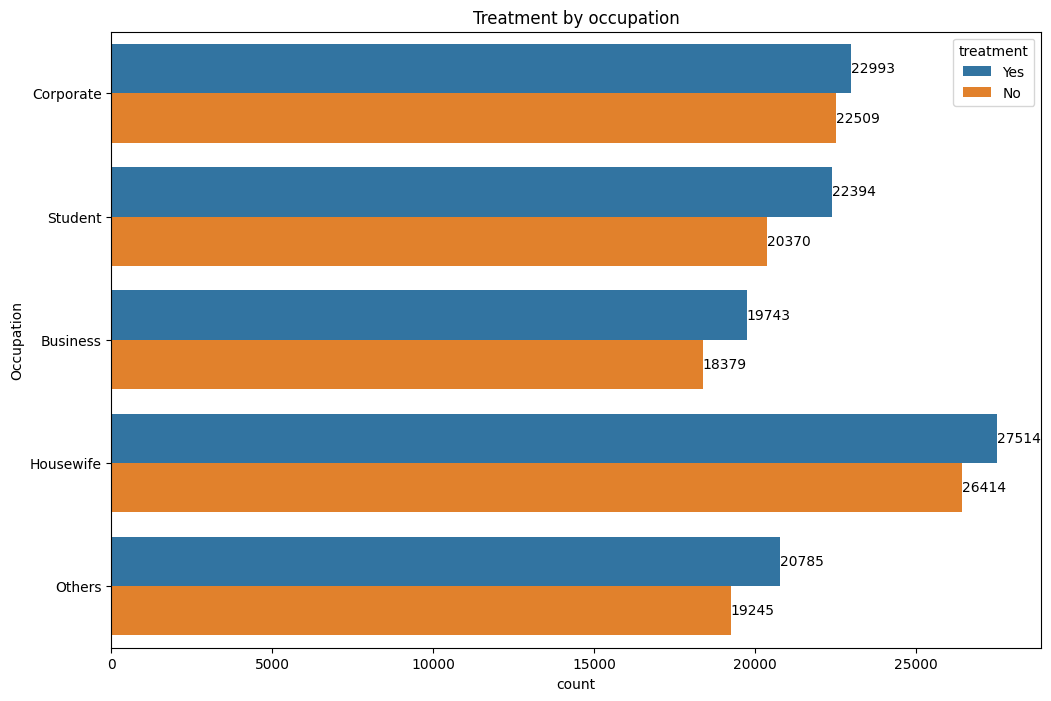

In [21]:
# Treatment by Occupation (horizontal bars)
plt.figure(figsize =(12,8))
ax = sns.countplot(y='Occupation', data=data, hue='treatment')

for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Treatment by occupation')
plt.show()



**comments Treatment by Occupation**

The distribution of treatment vs. no treatment is fairly balanced across occupations. Housewives and students have slightly higher numbers of treatment seekers, while business and corporate groups are more evenly split.
Comment:
Occupation does not show a strong disparity in treatment-seeking, but certain groups (housewives, students) may be more proactive about mental health.


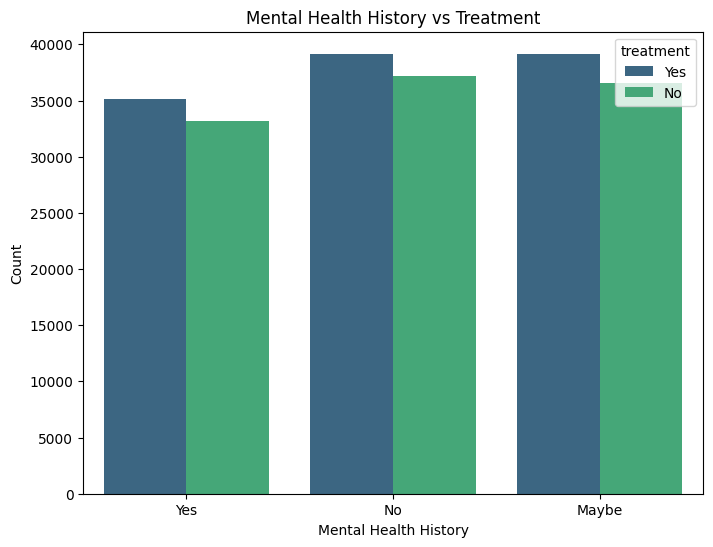

In [22]:
# Mental Health History vs Treatment
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Mental_Health_History", hue="treatment", data=data, palette="viridis")
plt.title("Mental Health History vs Treatment")
plt.xlabel("Mental Health History")
plt.ylabel("Count")
plt.show()


**Mental Health History vs Treatment**

A history of mental health issues increases the likelihood of seeking treatment, but a substantial number of people with no history also seek help, possibly for new or undiagnosed issues

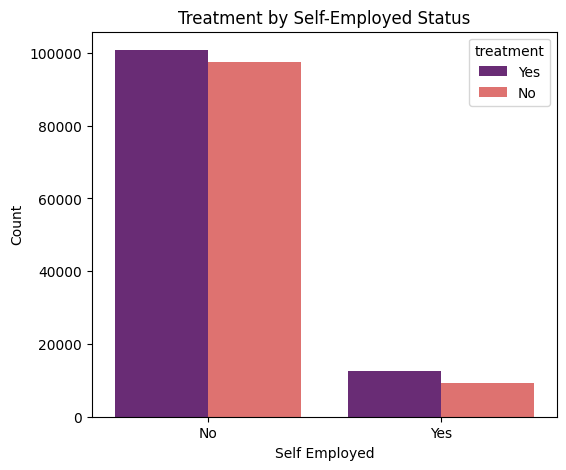

In [23]:
plt.figure(figsize=(6,5))
sns.countplot(x="self_employed", hue="treatment", data=data, palette="magma")
plt.title("Treatment by Self-Employed Status")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.show()



**comment on Treatment by Self-Employed Status**

Most respondents are not self-employed. Among both self-employed and non-self-employed groups, the number of people seeking treatment is similar to those not seeking treatment, but the overall count is much higher for non-self-employed individuals.

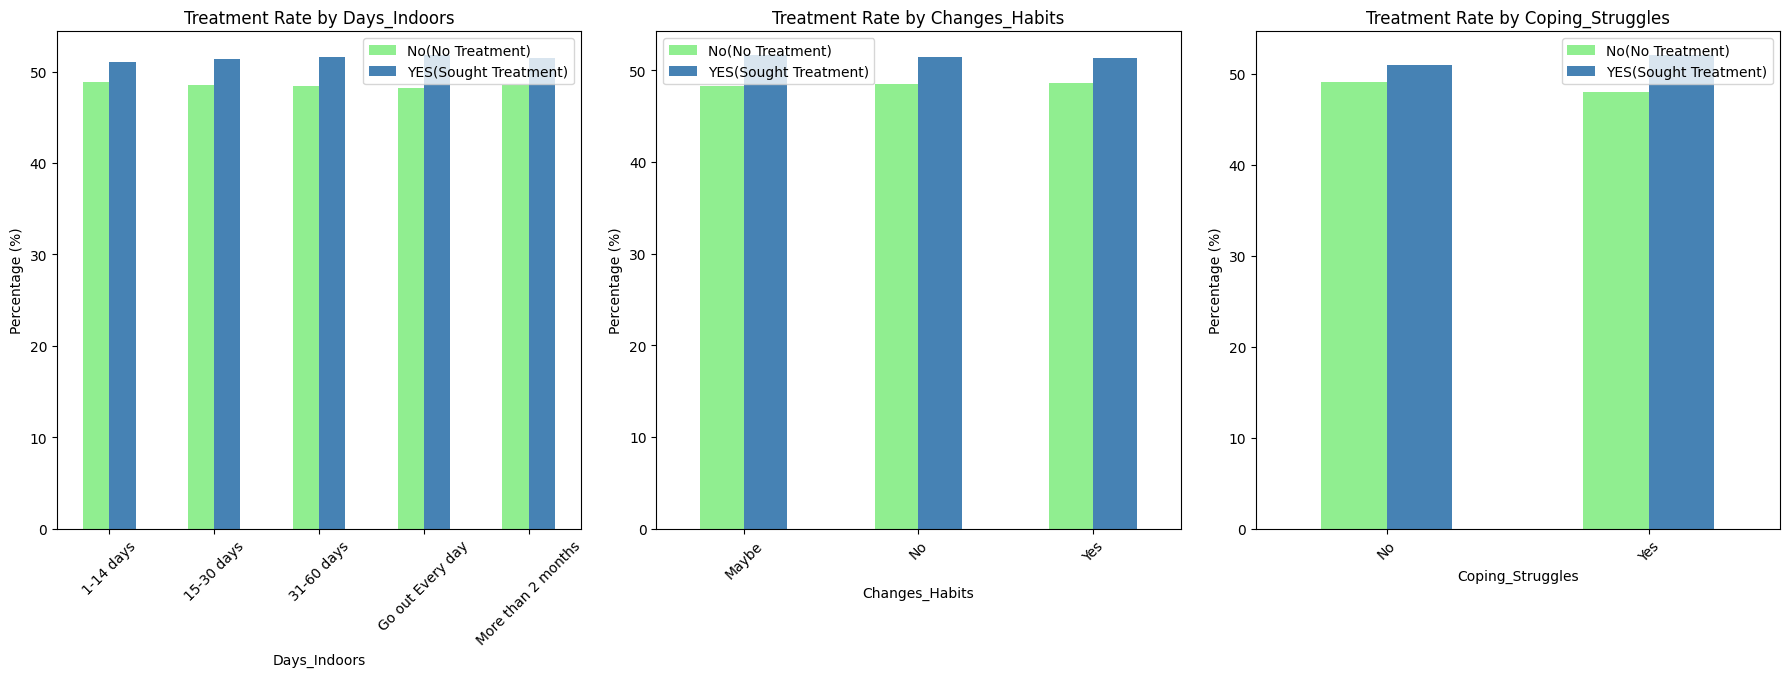

In [24]:
# Define the behavioral features and the target
behavioral_features = ['Days_Indoors', 'Changes_Habits', 'Coping_Struggles']
target = 'treatment'

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()  # Flatten the 2x3 array for easy indexing

for i, feature in enumerate(behavioral_features):
    # Create cross tabulation (percentage within each feature category)
    ct = pd.crosstab(data[feature], data[target], normalize='index') * 100

    # Plot
    ct.plot(kind='bar', ax=axes[i], color=['lightgreen', 'steelblue'])
    axes[i].set_title(f'Treatment Rate by {feature}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].legend(['No(No Treatment)', 'YES(Sought Treatment)'])
    plt.sca(axes[i])
    plt.xticks(rotation=45)


# Hide unused subplots
for j in range(len(behavioral_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


**comment on behavioral features and treatment**

The rate of seeking treatment is nearly the same regardless of days spent indoors, changes in habits, or coping struggles.
These behavioral features do not show a strong influence on mental health treatment decisions in this dataset.

#Psychological factors correlation with treatment


PSYCHOLOGICAL FACTORS ANALYSIS
______________________________


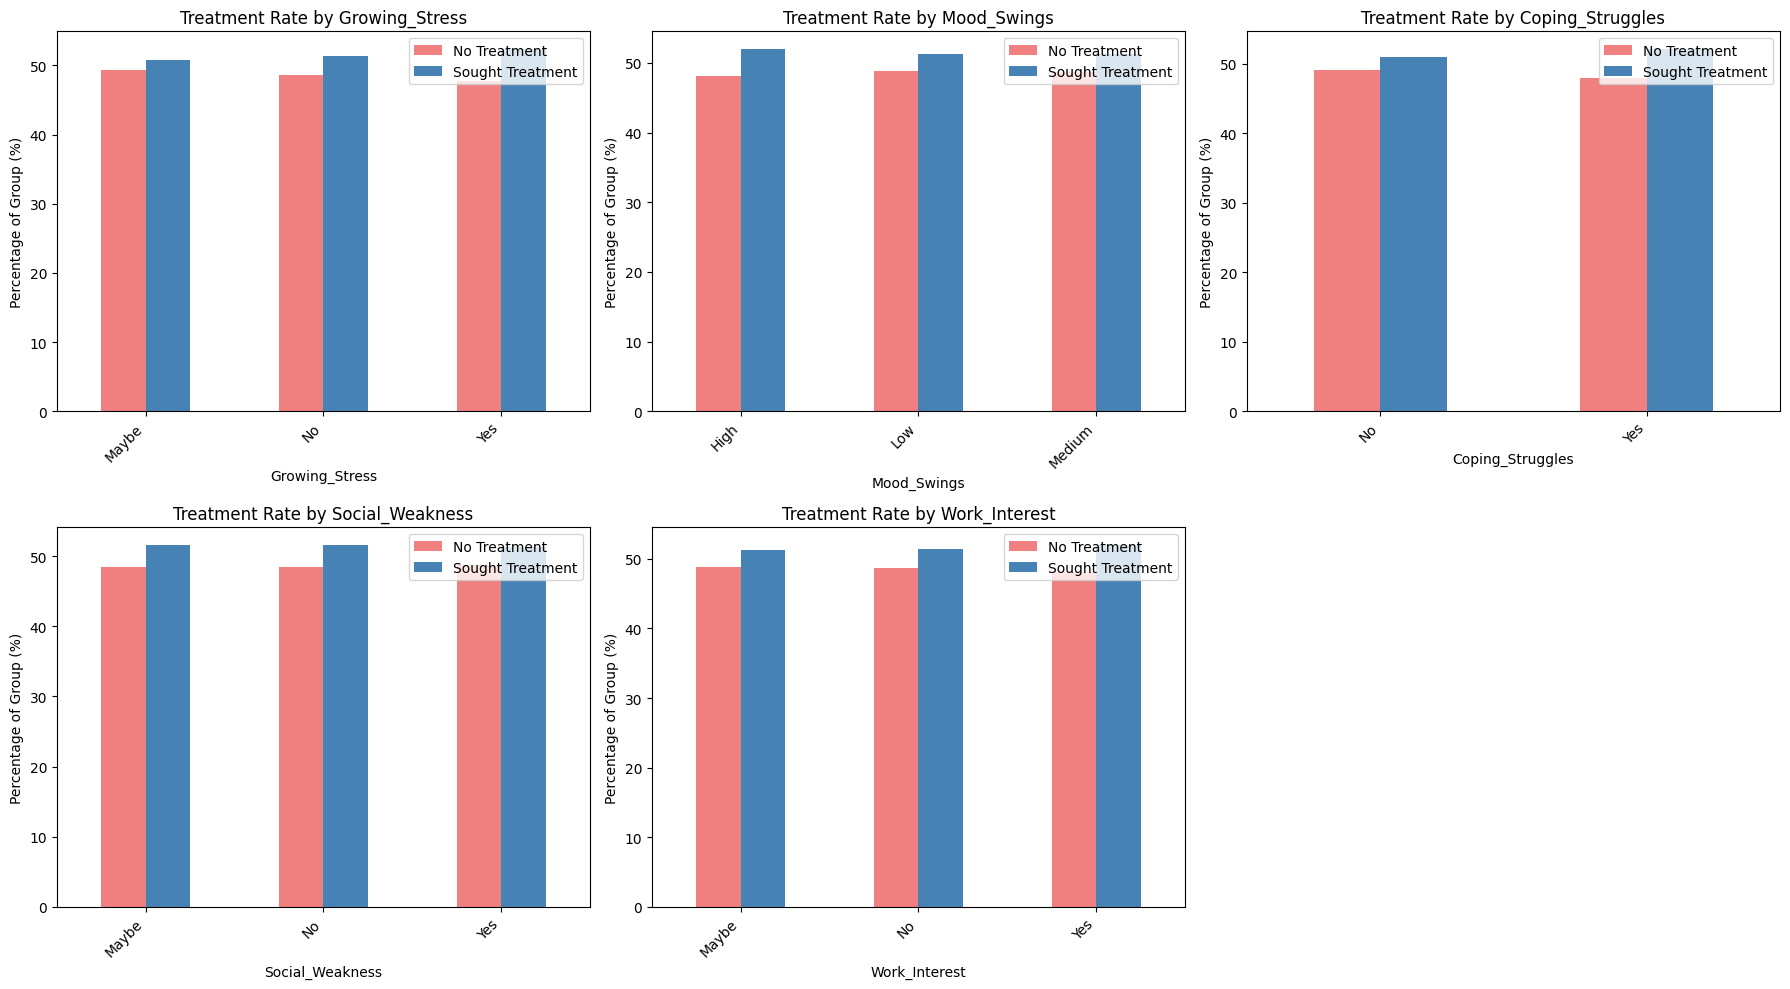

In [25]:
psych_factors = ['Growing_Stress', 'Mood_Swings', 'Coping_Struggles', 'Social_Weakness','Work_Interest']

print("PSYCHOLOGICAL FACTORS ANALYSIS")
print("_"*30)


# 2. Create a grid of plots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten the grid to make it easier to use

# 3. Make a bar chart for each psychological factor
for i, feature in enumerate(psych_factors):
    # 3a. Calculate the PERCENTAGE of people who sought treatment in each group
    # This is better than raw counts for comparison
    ct = pd.crosstab(data[feature], data[target], normalize='index') * 100

    # 3b. Create the bar chart
    ct.plot(kind='bar', ax=axes[i], color=['lightcoral', 'steelblue'])
    axes[i].set_title(f'Treatment Rate by {feature}')
    axes[i].set_ylabel('Percentage of Group (%)')
    axes[i].legend(['No Treatment', 'Sought Treatment'])
    plt.sca(axes[i])
    plt.xticks(rotation=45, ha='right') # Tilt the labels so they fit

# 4. Hide the empty 6th plot box in our 2x3 grid
axes[-1].set_visible(False)

# 5. Make everything fit nicely on the page and show the plots
plt.tight_layout()
plt.show()

**Comments on Psychological Factors vs Treatment**


Growing Stress, Mood Swings, Coping Struggles, Social Weakness, Work Interest:
For all psychological factors, the percentage of people seeking treatment is almost equal to those not seeking treatment within each group. This suggests these individual psychological factors do not have a strong direct influence on treatment-seeking behavior in this dataset.

# Statistical analysis using CHI-Square Test

In [26]:
# Target
target = "treatment"

# Select only categorical features (object or category dtype)
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target from features
categorical_features = [col for col in categorical_features if col != target]

chi2_results = []

for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(data[feature], data[target])

    # Perform Chi-Square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    chi2_results.append({
        "Feature": feature,
        "Chi2": chi2,
        "p-value": p,
        "Significant": "Yes" if p < 0.05 else "No"
    })

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results).sort_values("Chi2", ascending=False).reset_index(drop=True)

print(chi2_df)



                    Feature          Chi2       p-value Significant
0            family_history  30774.746407  0.000000e+00         Yes
1              care_options  18205.575075  0.000000e+00         Yes
2                   Country  15392.499397  0.000000e+00         Yes
3                    Gender   7799.616725  0.000000e+00         Yes
4   mental_health_interview   2266.828498  0.000000e+00         Yes
5             self_employed    354.623499  4.171821e-79         Yes
6                Occupation     39.011398  6.928785e-08         Yes
7            Growing_Stress     37.955168  5.729808e-09         Yes
8          Coping_Struggles     24.828653  6.265910e-07         Yes
9             Work_Interest      8.433837  1.474401e-02         Yes
10              Mood_Swings      8.138332  1.709164e-02         Yes
11             Days_Indoors      4.823292  3.059141e-01          No
12    Mental_Health_History      3.580009  1.669594e-01          No
13           Changes_Habits      1.633159  4.419

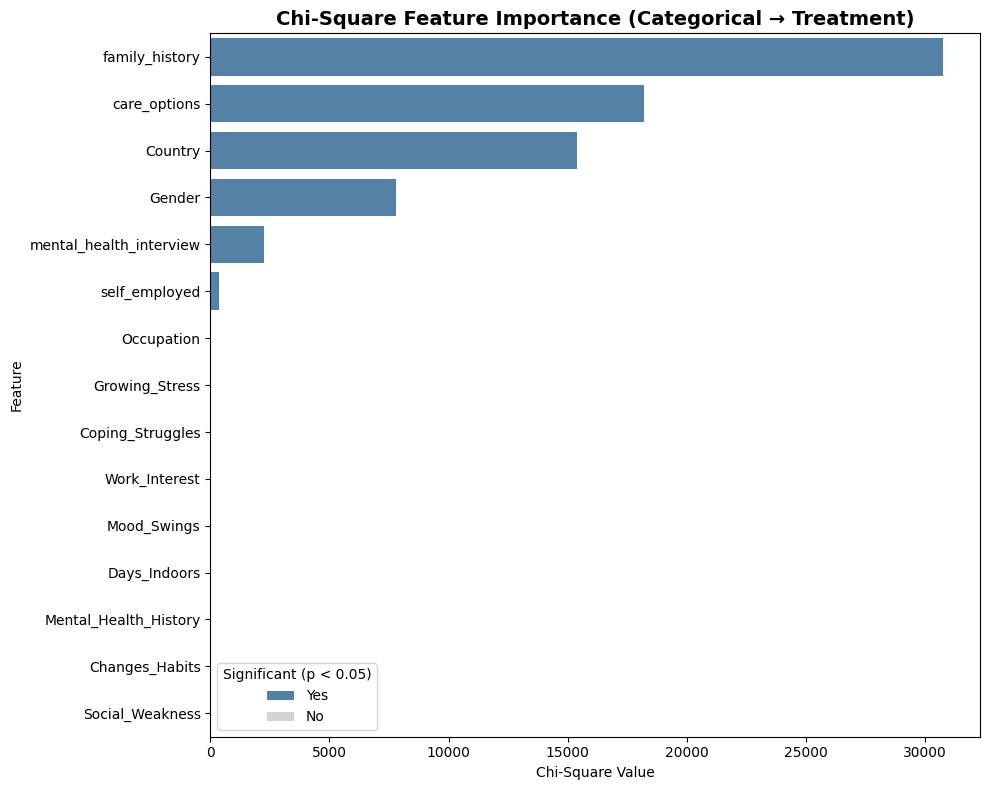

In [27]:
# Sort by Chi2 score for plotting
chi2_plot = chi2_df.sort_values("Chi2", ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=chi2_plot,
    x="Chi2",
    y="Feature",
    hue="Significant",
    dodge=False,
    palette={"Yes": "steelblue", "No": "lightgray"}
)

plt.title("Chi-Square Feature Importance (Categorical → Treatment)", fontsize=14, fontweight="bold")
plt.xlabel("Chi-Square Value")
plt.ylabel("Feature")
plt.legend(title="Significant (p < 0.05)")
plt.tight_layout()
plt.show()


The Chi-Square test was used to measure the statistical association between each categorical feature and the target variable (treatment).
It helps identify which features have a significant impact on treatment-seeking behavior.

Features like family_history, care_options, country, gender, and mental_health_interview show strong associations (high Chi2, p < 0.05).

Features with low Chi2 and high p-values (e.g., Days_Indoors, Work_Interest, Mood_Swings, Social_Weakness, Changes_Habits) are not significant.


In [28]:
# Features to drop based on chi-square test results
drop_features = [
    "Social_Weakness",
    "Changes_Habits",
    "Work_Interest"
]
# Drop from dataset
data = data.drop(columns=drop_features)


In [29]:
data['Country'].unique()

array(['United States', 'Poland', 'Australia', 'Canada', 'United Kingdom',
       'South Africa', 'Sweden', 'New Zealand', 'Netherlands', 'India',
       'Belgium', 'Ireland', 'France', 'Portugal', 'Brazil', 'Costa Rica',
       'Russia', 'Germany', 'Switzerland', 'Finland', 'Israel', 'Italy',
       'Bosnia and Herzegovina', 'Singapore', 'Nigeria', 'Croatia',
       'Thailand', 'Denmark', 'Mexico', 'Greece', 'Moldova', 'Colombia',
       'Georgia', 'Czech Republic', 'Philippines'], dtype=object)

In [30]:
print(len(data["Country"].unique()))


35


In [31]:
country_counts = data['Country'].value_counts()

country_counts

,count
Country,
United States,129532
United Kingdom,38531
Canada,13773
Australia,4834
Netherlands,4383
Ireland,4250
Germany,3389
Sweden,2274
India,2124


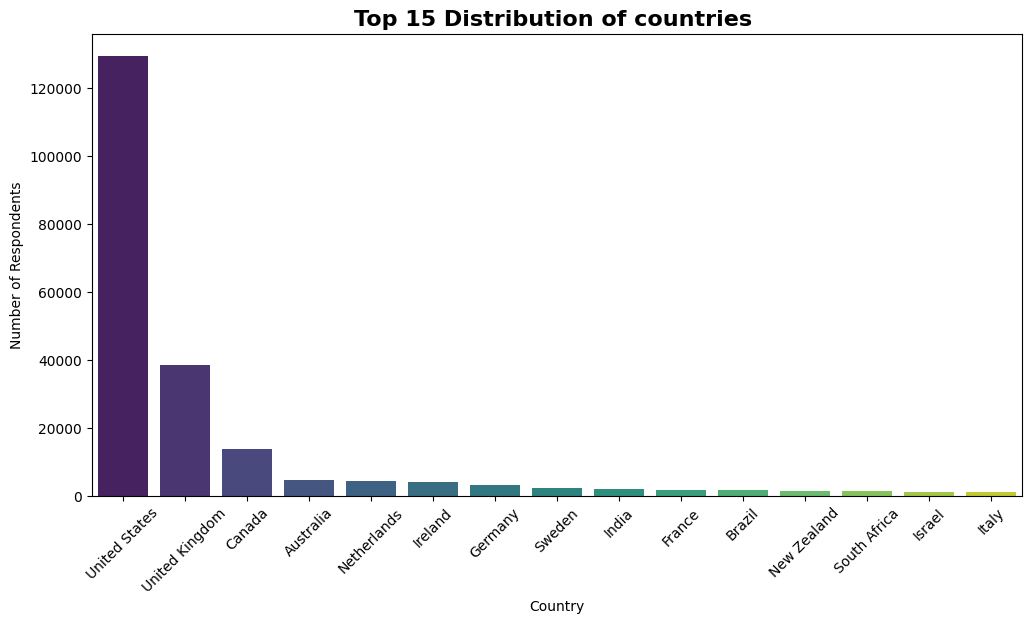

In [32]:
#visualize how country are distributed

# Count of respondents per country
plt.figure(figsize=(12,6))
country_counts = data['Country'].value_counts().head(15)

sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")

plt.title("Top 15 Distribution of countries ", fontsize=16, fontweight="bold")
plt.ylabel("Number of Respondents")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()



In [33]:

# Calculate treatment rate by country
treatment_rate = (
    data.groupby("Country")["treatment"]
    .apply(lambda x: (x == "Yes").mean())  # percentage of Yes
    .sort_values(ascending=False)
)
treatment_rate


,treatment
Country,
Poland,1.000000
Croatia,1.000000
Denmark,1.000000
Moldova,1.000000
New Zealand,0.818938
South Africa,0.637821
Australia,0.618329
Canada,0.599361
United States,0.551509


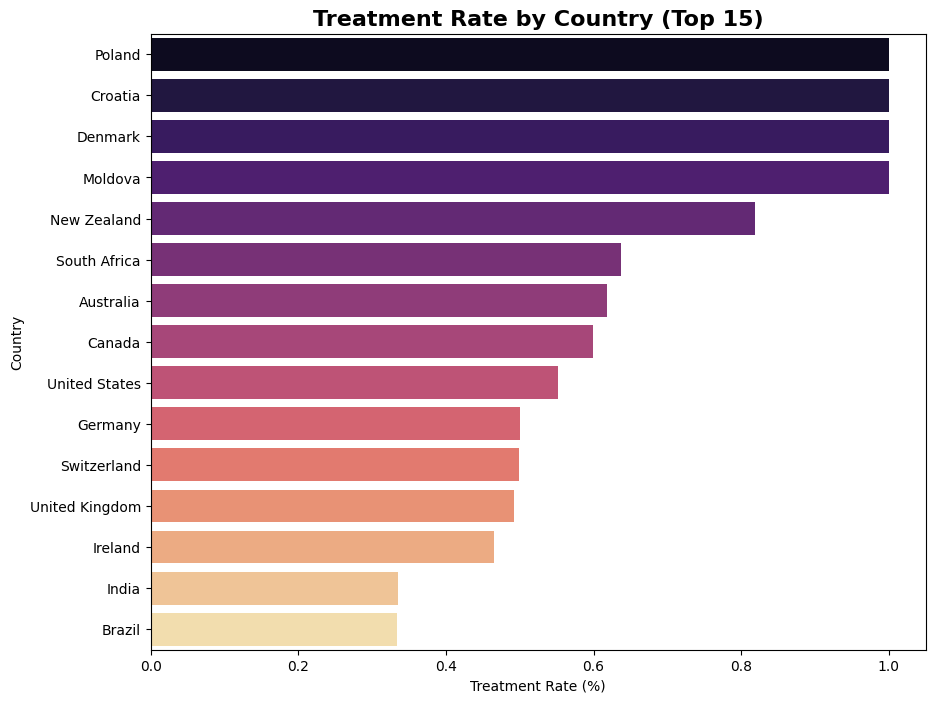

In [34]:
# Plot top 15 countries
plt.figure(figsize=(10,8))
sns.barplot(
    y=treatment_rate.head(15).index,
    x=treatment_rate.head(15).values,
    palette="magma",
    orient="h"
)

plt.title("Treatment Rate by Country (Top 15)", fontsize=16, fontweight="bold")
plt.xlabel("Treatment Rate (%)")
plt.ylabel("Country")
plt.show()

In [35]:
# 1. Get your list of top treatment rate countries (from your analysis)
top_treatment_countries = ['Poland', 'Croatia', 'Moldova', 'New Zealand', 'South Africa']

# 2. Get the list of high population countries (from value_counts)
high_pop_countries = ['United States', 'United Kingdom', 'Canada', 'Australia','Netherlands','Ireland'] # Top 6 from your value_counts

# 3. Combine both lists and remove duplicates
countries_to_keep = list(set(top_treatment_countries + high_pop_countries))
print("Countries to keep:", countries_to_keep)

# 4. Create the new grouped column
data['Country_Grouped'] = data['Country'].apply(
    lambda x: x if x in countries_to_keep else 'Other'
)

# 5. Check the results
print(f"\nOriginal countries: {data['Country'].nunique()}")
print(f"Grouped categories: {data['Country_Grouped'].nunique()}")


Countries to keep: ['Croatia', 'South Africa', 'Poland', 'United States', 'Canada', 'United Kingdom', 'Australia', 'Ireland', 'New Zealand', 'Netherlands', 'Moldova']

Original countries: 35
Grouped categories: 12


- **high_pop_countries**: This list contains countries with the largest number of survey respondents. Including these ensures that the analysis captures the majority of the data and reflects trends from the most represented populations.

- **top_treatment_countries**: This list includes countries with the highest mental health treatment rates. Including these helps highlight regions where treatment-seeking behavior is most prevalent, even if their population is smaller.


By merging both lists, you ensure that your analysis captures both the most represented countries (for statistical reliability) and those with notable treatment rates (for meaningful insights), providing a more comprehensive and balanced view.

#Encoding


In [36]:
len(data['Days_Indoors'].unique())

5

In [37]:
data

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Mental_Health_History,Mood_Swings,Coping_Struggles,mental_health_interview,care_options,Country_Grouped
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,Yes,Medium,No,Maybe,Yes,United States
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,Yes,Medium,No,No,Yes,United States
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,Yes,Medium,No,Maybe,Not sure,Poland
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,Yes,Medium,No,No,Not sure,Australia
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,Yes,Medium,No,No,No,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226242,Male,United States,Corporate,No,No,No,More than 2 months,No,Maybe,Medium,No,No,Yes,United States
226243,Male,United States,Corporate,No,No,No,More than 2 months,No,Maybe,Medium,No,No,No,United States
226244,Male,United States,Corporate,No,No,No,More than 2 months,No,Maybe,Medium,No,No,No,United States
226245,Male,Australia,Corporate,No,No,No,More than 2 months,No,Maybe,Medium,No,No,No,Australia


In [38]:
#OHE for the nominal features(no order)
nominal_cols = ['Occupation','Country_Grouped']
df_encoded = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# convert only boolean columns to int
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


One-hot encoding is used for 'Occupation' and 'Country_Grouped' because these are nominal categorical features.
This approach creates binary columns for each category, allowing machine learning models to interpret them correctly
without assuming any order or relationship between categories.

In [39]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 1. Binary Yes/No columns → LabelEncoder
binary_cols = [
    "self_employed","family_history",
     "Mental_Health_History","Coping_Struggles"]


# Dictionary to hold encoders for each column
label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


# --- Encode target separately ---
target_encoder = LabelEncoder()
df_encoded["treatment"] = target_encoder.fit_transform(df_encoded["treatment"])


Label encoding is used for binary (Yes/No) columns and the target variable.
This converts categorical values into numeric form (0/1), which is suitable for machine learning models.


In [40]:
#encode gender
le_gender = LabelEncoder()
df_encoded ['Gender']=le_gender.fit_transform(df_encoded['Gender'])   # explicitly fit both


In [41]:
from sklearn.preprocessing import OrdinalEncoder

# First, make sure all values are strings and clean them
for col in ['Mood_Swings', 'Days_Indoors', 'care_options', 'mental_health_interview', 'Growing_Stress']:
    df_encoded[col] = df_encoded[col].astype(str).str.strip().str.title()

# Now use OrdinalEncoder with the correct categories
encoders = {
    'Mood_Swings': OrdinalEncoder(categories=[['Low', 'Medium', 'High']]),
    'Days_Indoors': OrdinalEncoder(categories=[['Go Out Every Day', '1-14 Days', '15-30 Days', '31-60 Days', 'More Than 2 Months']]),
    'care_options': OrdinalEncoder(categories=[['No', 'Not Sure', 'Yes']]),
    'mental_health_interview': OrdinalEncoder(categories=[['No', 'Maybe', 'Yes']]),
    'Growing_Stress': OrdinalEncoder(categories=[['No', 'Maybe', 'Yes']])
}

for col, encoder in encoders.items():
    df_encoded[col] = encoder.fit_transform(df_encoded[[col]]).flatten().astype(int)

Ordinal encoding was used for features with a meaningful order (e.g., Mood_Swings, Days_Indoors).
This converts ordered categories into integer values, allowing models to recognize and use the ranking information.
Each encoder is set with explicit category order to ensure correct mapping.

In [42]:
df_encoded

,Gender,Country,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Mental_Health_History,Mood_Swings,Coping_Struggles,...,Country_Grouped_Croatia,Country_Grouped_Ireland,Country_Grouped_Moldova,Country_Grouped_Netherlands,Country_Grouped_New Zealand,Country_Grouped_Other,Country_Grouped_Poland,Country_Grouped_South Africa,Country_Grouped_United Kingdom,Country_Grouped_United States
3,0,United States,0,1,1,1,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,United States,0,1,1,1,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,Poland,0,0,1,1,2,2,1,0,...,0,0,0,0,0,0,1,0,0,0
6,0,Australia,0,1,1,1,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,United States,0,0,0,1,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226242,1,United States,0,0,0,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
226243,1,United States,0,0,0,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
226244,1,United States,0,0,0,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
226245,1,Australia,0,0,0,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#Sentiment Analysis

In [43]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
# Example mappings from numbers → descriptive words
stress_map = {0: "low stress", 1: "moderate stress", 2: "high stress"}
mood_map = {0: "stable mood", 1: "mild mood swings", 2: "frequent mood swings"}
coping_map = {0: "rarely struggles", 1: "sometimes struggles", 2: "often struggles"}
indoors_map = {
    0: "goes out every day",
    1: "stays indoors 1–14 days",
    2: "stays indoors 15–30 days",
    3: "stays indoors 31–60 days",
    4: "stays indoors over 60 days"
}
family_map = {0: "no family history of mental illness", 1: "a family history of mental illness"}
gender_map = {0: "female", 1: "male"}

# Create the text profile
df_encoded['text_profile'] = (
    "This person is " + df_encoded['Gender'].map(gender_map).fillna("unknown") + ", " +
    "with " + df_encoded['family_history'].map(family_map).fillna("unknown") + ". " +
    "They have " + df_encoded['Growing_Stress'].map(stress_map).fillna("unknown") + ", " +
    "show " + df_encoded['Mood_Swings'].map(mood_map).fillna("unknown") + ", " +
    "and " + df_encoded['Days_Indoors'].map(indoors_map).fillna("unknown") + ". " +
    "They " + df_encoded['Coping_Struggles'].map(coping_map).fillna("unknown") + "."
)



print(df_encoded['text_profile'].iloc[5])


This person is female, with no family history of mental illness. They have high stress, show mild mood swings, and stays indoors 1–14 days. They rarely struggles.


Since the dataset did not have text-based features, we converted numeric values into descriptive phrases.
This allowed us to build a readable text profile for each person, summarizing their mental health status and behaviors.
These text profiles were then used for sentiment analysis.

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df_encoded['sentiment_compound'] = df_encoded['text_profile'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Show some results
print(df_encoded[['text_profile', 'sentiment_compound']].tail(2))


                                             text_profile  sentiment_compound
226237  This person is male, with no family history of...             -0.7711
226238  This person is male, with a family history of ...             -0.6694
226239  This person is male, with a family history of ...             -0.6694
226240  This person is male, with a family history of ...             -0.6694
226241  This person is male, with a family history of ...             -0.6694
226242  This person is male, with no family history of...             -0.7711
226243  This person is male, with no family history of...             -0.7711
226244  This person is male, with no family history of...             -0.7711
226245  This person is male, with no family history of...             -0.7711
226246  This person is male, with no family history of...             -0.7711


In [47]:
print(df_encoded['text_profile'].unique()[:10])  # show first 10 unique profiles


['This person is female, with a family history of mental illness. They have high stress, show mild mood swings, and stays indoors 1–14 days. They rarely struggles.'
 'This person is female, with no family history of mental illness. They have high stress, show mild mood swings, and stays indoors 1–14 days. They rarely struggles.'
 'This person is female, with a family history of mental illness. They have low stress, show mild mood swings, and goes out every day. They sometimes struggles.'
 'This person is female, with no family history of mental illness. They have low stress, show mild mood swings, and goes out every day. They sometimes struggles.'
 'This person is female, with a family history of mental illness. They have high stress, show mild mood swings, and stays indoors over 60 days. They sometimes struggles.'
 'This person is female, with no family history of mental illness. They have high stress, show mild mood swings, and stays indoors over 60 days. They sometimes struggles.'
 

In [48]:
def sentiment_analysis(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df_encoded['sentiment_label'] = df_encoded['sentiment_compound'].apply(sentiment_analysis)

print(df_encoded['sentiment_label'].value_counts())


sentiment_label
negative    220346
Name: count, dtype: int64


In [49]:
#drop timestamp,country,text_profile,sentiment label
df_encoded.drop(['Country','text_profile','sentiment_label'],axis=1,inplace=True)

In [50]:
df_encoded

,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Mental_Health_History,Mood_Swings,Coping_Struggles,mental_health_interview,...,Country_Grouped_Ireland,Country_Grouped_Moldova,Country_Grouped_Netherlands,Country_Grouped_New Zealand,Country_Grouped_Other,Country_Grouped_Poland,Country_Grouped_South Africa,Country_Grouped_United Kingdom,Country_Grouped_United States,sentiment_compound
3,0,0,1,1,1,2,2,1,0,1,...,0,0,0,0,0,0,0,0,1,-0.5252
4,0,0,1,1,1,2,2,1,0,0,...,0,0,0,0,0,0,0,0,1,-0.5252
5,0,0,0,1,1,2,2,1,0,1,...,0,0,0,0,0,1,0,0,0,-0.6798
6,0,0,1,1,1,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.5252
7,0,0,0,0,1,2,2,1,0,0,...,0,0,0,0,0,0,0,0,1,-0.6798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226242,1,0,0,0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,-0.7711
226243,1,0,0,0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,-0.7711
226244,1,0,0,0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,-0.7711
226245,1,0,0,0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.7711


#Modelling

In [51]:
X = df_encoded.drop(['treatment'],axis=1)
y = df_encoded['treatment']

In [52]:
#train_test and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [53]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Initialize the MLP Classifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Network architecture: 2 hidden layers with 100 and 50 neurons
    activation='relu',             # Activation function for the hidden layers
    solver='adam',                 # Algorithm for weight optimization
    max_iter=1000,                 # Maximum number of iterations
    random_state=42,               # Seed for reproducibility
    early_stopping=True,           # Stop if validation score doesn't improve
    n_iter_no_change=10            # Number of iterations to wait for no change before stopping
)

# Train the model on the scaled training data
print("Training the Neural Network...")
mlp_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))



Training the Neural Network...
Accuracy: 0.773791695030633

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75     21384
           1       0.75      0.84      0.79     22686

    accuracy                           0.77     44070
   macro avg       0.78      0.77      0.77     44070
weighted avg       0.78      0.77      0.77     44070





We used an MLP (Multi-Layer Perceptron) neural network because our dataset has multiple features and complex relationships.

Neural networks can capture non-linear patterns better than simple models, which is useful for predicting mental health outcomes.

Early stopping and the 'adam' optimizer improve training efficiency and help prevent overfitting.
Overall, this approach is suitable for our structured dataset and provides strong predictive performance.

LOGISTIC REGRESSION
Accuracy: 0.7115
Confusion Matrix:
[[15440  5944]
 [ 6768 15918]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     21384
           1       0.73      0.70      0.71     22686

    accuracy                           0.71     44070
   macro avg       0.71      0.71      0.71     44070
weighted avg       0.71      0.71      0.71     44070

Cross-Validation Accuracy: 0.7120 (+/- 0.0018)
RANDOM FOREST
Accuracy: 0.7358
Confusion Matrix:
[[14813  6571]
 [ 5074 17612]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72     21384
           1       0.73      0.78      0.75     22686

    accuracy                           0.74     44070
   macro avg       0.74      0.73      0.73     44070
weighted avg       0.74      0.74      0.74     44070

Cross-Validation Accuracy: 0.7385 (+/- 0.0018)
GRADIENT BOOSTING
Accuracy: 0.7417
Con

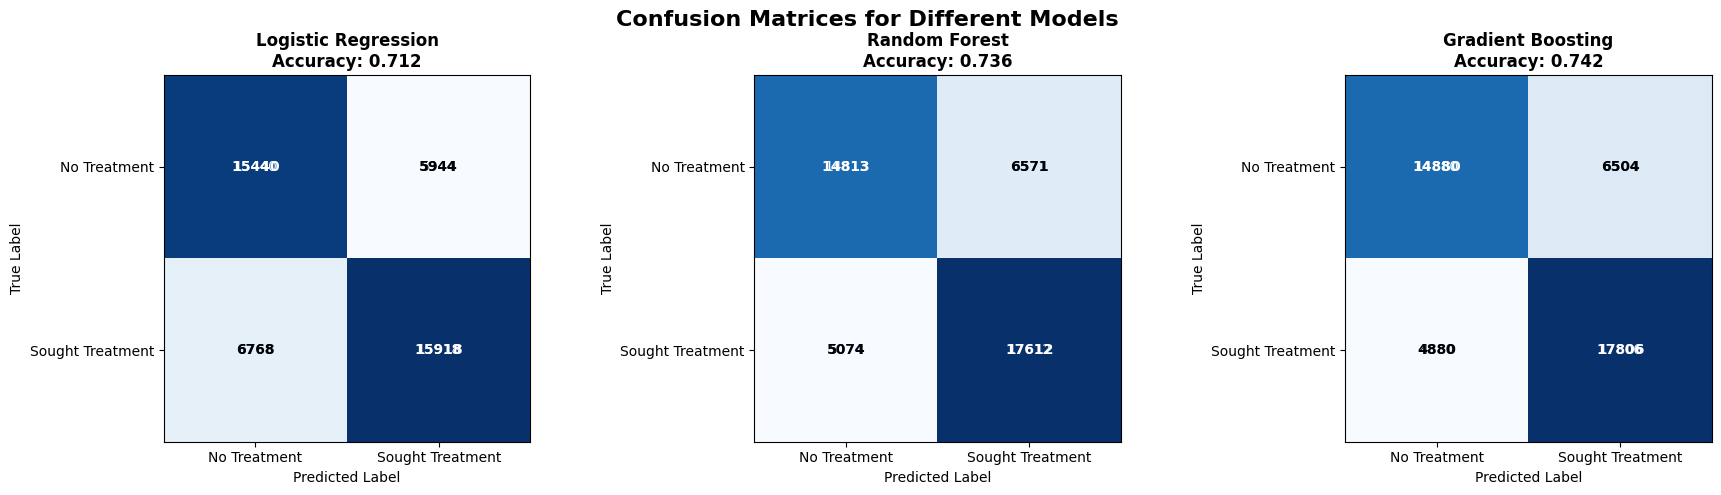

In [55]:
# Import additional library for visualization
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2. Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Using StratifiedKFold for cross-validation to maintain class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

# Create a figure for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices for Different Models', fontsize=16, fontweight='bold')

for i, (name, model) in enumerate(models.items()):

    print(f"{name.upper()}")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_accuracy': np.mean(cv_scores),
        'model': model,
        'confusion_matrix': conf_matrix,
        'predictions': y_pred
    }

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                 display_labels=['No Treatment', 'Sought Treatment'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'{name}\nAccuracy: {accuracy:.3f}', fontweight='bold')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

    # Add annotations with counts
    for i_i in range(2):
        for j in range(2):
            axes[i].text(j, i_i, f'{conf_matrix[i_i, j]}',
                       ha='center', va='center',
                       color='white' if conf_matrix[i_i, j] > conf_matrix.max()/2 else 'black',
                       fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()



# Feature Importance using Random Forest!

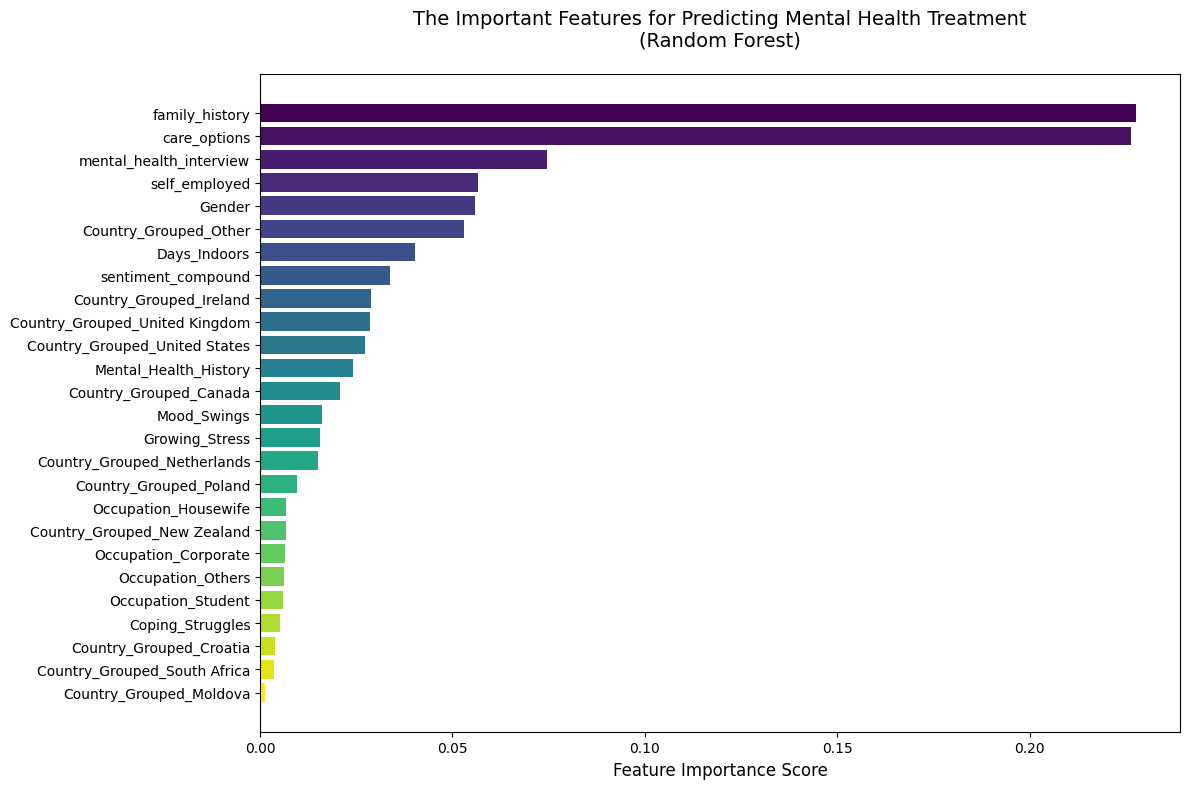

In [56]:

# Get the trained Random Forest model
rf_model = results['Random Forest']['model']

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': X.columns,  # Use your original feature names
    'importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Create the feature importance plot
plt.figure(figsize=(12, 8))
top_features = feature_importance_df

# Create horizontal bar plot
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
bars = plt.barh(top_features['feature'], top_features['importance'], color=colors)

plt.xlabel('Feature Importance Score', fontsize=12)
plt.title('The Important Features for Predicting Mental Health Treatment\n(Random Forest)', fontsize=14, pad=20)
plt.gca().invert_yaxis()  # Most important at the top

plt.tight_layout()
plt.show()


The Random Forest feature importance plot shows which variables most influence the prediction of mental health treatment in your project. The top features are **family_history**, **care_options**, and **mental_health_interview**, meaning these factors are most strongly associated with whether someone seeks treatment. Other important features include **self_employed**, **Country_Grouped**, and **Gender**.


This result aligns with the statistical analysis we did ci-square, confirming that personal and workplace factors, as well as access to care, are critical in predicting treatment-seeking behavior.

# Hyperparameter tuning for Random Forest


In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid (keep ranges realistic to avoid very long runs)
param_dist = {
    'n_estimators': [100, 200, 300],  # number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],    # depth of each tree
    'min_samples_split': [2, 5, 10],            # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],              # minimum samples at leaf node
    'max_features': ['sqrt', 'log2']            # number of features to consider at each split
}

# Initialize RandomForest
rf = RandomForestClassifier(random_state=42)

# Randomized Search (faster than GridSearchCV)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                # number of random combinations to try
    cv=3,                     # 3-fold CV inside the search
    verbose=2,
    random_state=42,
    n_jobs=-1                 # use all available CPU cores
)

# Fit on training data
rf_random.fit(X_train_scaled, y_train)

# Best parameters & model
print("Best Parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

# Evaluate tuned model
y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Tuned Random Forest Accuracy: 0.7561

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.73     21384
           1       0.74      0.81      0.77     22686

    accuracy                           0.76     44070
   macro avg       0.76      0.75      0.75     44070
weighted avg       0.76      0.76      0.76     44070



  - The best model is mlp_model with accuracy of 78

# Saving the model

In [58]:
import joblib

# Save models and encoders
joblib.dump(mlp_model, "mlp_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(le_gender, "gender_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(target_encoder, "target_encoder.pkl")


ohe_columns = df_encoded.columns.tolist()
joblib.dump(ohe_columns, "ohe_columns.pkl")

# Save each ordinal encoder individually
for col, encoder in encoders.items():
joblib.dump(encoder, f"{col}_encoder.pkl") # for Days_Indoors_encoder.pkl,Growing_Stress_encoder.pkl,Mood_Swings_encoder.pkl,mental_health_interview_encoder.pkl,care_options_encoder.pkl


